In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import attila_utils

In [2]:
fpath = '../../resources/VAF/scz_snv_vova2.csv'
calls = pd.read_csv(fpath)
calls

,CHROM,POS,REF,ALT,AF,DP,mean_cov,Individual ID,subjectID
0,1,11973569,C,T,0.02,199,256.144,CMC_MSSM_027,MSSM_027
1,1,67324428,A,T,0.06,196,256.144,CMC_MSSM_027,MSSM_027
2,1,182008461,C,T,0.06,167,256.144,CMC_MSSM_027,MSSM_027
3,1,207598957,C,T,0.06,195,256.144,CMC_MSSM_027,MSSM_027
4,1,219342012,C,T,0.02,216,256.144,CMC_MSSM_027,MSSM_027
...,...,...,...,...,...,...,...,...,...
3279,9,139251813,G,A,0.02,203,249.098,CMC_PITT_118,PITT_118
3280,9,139721837,G,A,0.18,227,249.098,CMC_PITT_118,PITT_118
3281,X,5889841,G,A,0.20,237,249.098,CMC_PITT_118,PITT_118
3282,X,71258041,C,T,0.04,207,249.098,CMC_PITT_118,PITT_118


In [3]:
calls.AF.unique()

array([0.02, 0.06, 0.16, 0.04, 0.08, 0.2 , 0.18, 0.14, 0.1 , 0.12, 0.22,
       0.3 , 0.24, 0.26, 0.32, 0.34, 0.28, 0.36, 0.38])

['named-figure/vaf-histogram.png', 'named-figure/vaf-histogram.pdf']

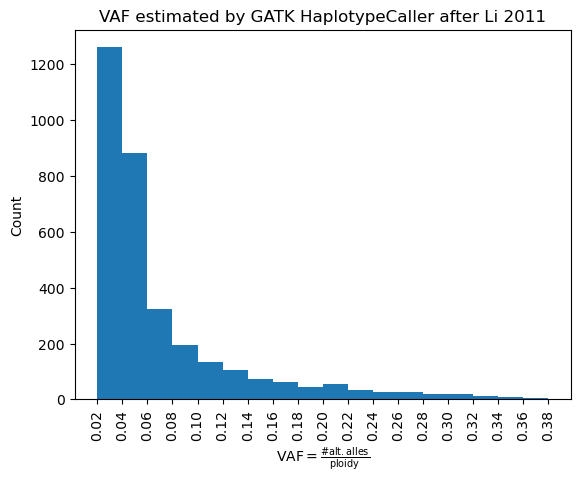

In [4]:
fig, ax = plt.subplots()
ax.hist(calls.AF, bins=np.sort(calls.AF.unique()), histtype='bar')
ax.set_title('VAF estimated by GATK HaplotypeCaller after Li 2011')
ax.set_xlabel(r'$\mathrm{VAF} = \frac{\# \mathrm{alt.alles}}{\mathrm{ploidy}}$')
ax.set_ylabel('Count')
ax.set_xticks(np.sort(calls.AF.unique()))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
attila_utils.savefig(fig, 'vaf-histogram')

In [5]:
fpath = '../../resources/VAF/Maury_et_al_callset_CollectAllelicCounts_VAF_and_samtools_mpileup_BQMQ_SZ.csv'
calls1 = pd.read_csv(fpath)
calls1['- baseQ_mean'] = - calls1.baseQ_mean
calls1['VAF difference'] = calls1.AF - calls1['AllelicCounts_VAF']
calls1

,Individual_ID,CHROM,POS,REF,ALT,AF,DP,AllelicCounts_REF,AllelicCounts_ALT,AllelicCounts_VAF,AF_minus_VAF,TOTAL_READ_COUNT,baseQ_mean,mapQ_mean,- baseQ_mean,VAF difference
0,CMC_MSSM_027,1,11973569,C,T,0.02,199,C,T,0.0300,-0.0100,183,33.535519,60.0,-33.535519,-0.0100
1,CMC_MSSM_027,1,67324428,A,T,0.06,196,A,T,0.0503,0.0097,182,35.576923,60.0,-35.576923,0.0097
2,CMC_MSSM_027,1,182008461,C,T,0.06,167,C,T,0.0588,0.0012,155,29.490323,60.0,-29.490323,0.0012
3,CMC_MSSM_027,1,207598957,C,T,0.06,195,C,T,0.0508,0.0092,179,30.810056,60.0,-30.810056,0.0092
4,CMC_MSSM_027,1,219342012,C,T,0.02,216,C,T,0.0276,-0.0076,196,30.882653,60.0,-30.882653,-0.0076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3378,CMC_PITT_118,9,139251813,G,A,0.02,203,G,A,0.0289,-0.0089,156,29.429487,60.0,-29.429487,-0.0089
3379,CMC_PITT_118,9,139721837,G,A,0.18,227,G,A,0.2011,-0.0211,169,32.544379,60.0,-32.544379,-0.0211
3380,CMC_PITT_118,X,5889841,G,A,0.20,237,G,A,0.1869,0.0131,172,31.581395,60.0,-31.581395,0.0131
3381,CMC_PITT_118,X,71258041,C,T,0.04,207,C,T,0.0393,0.0007,157,30.764331,60.0,-30.764331,0.0007


/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


['named-figure/baseQ_mean-hist.png', 'named-figure/baseQ_mean-hist.pdf']

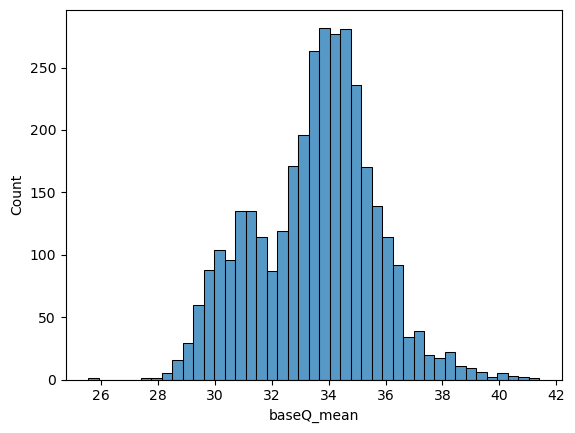

In [6]:
fig, ax = plt.subplots()
sns.histplot(data=calls1.baseQ_mean, ax=ax)
attila_utils.savefig(fig, 'baseQ_mean-hist')

/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


['named-figure/baseQ_mean-vs-mapQ_mean.png',
 'named-figure/baseQ_mean-vs-mapQ_mean.pdf']

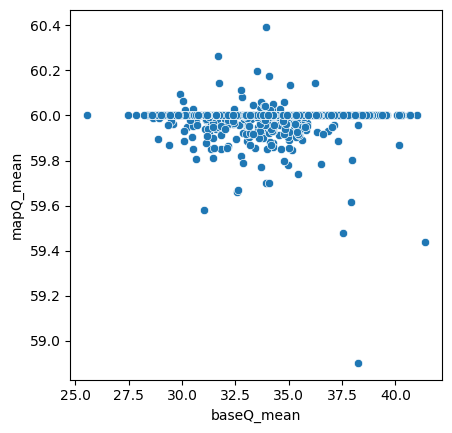

In [7]:
fig, ax = plt.subplots(figsize=(4.8, 4.8))
sns.scatterplot(data=calls1, x='baseQ_mean', y='mapQ_mean', ax=ax)
attila_utils.savefig(fig, 'baseQ_mean-vs-mapQ_mean')

/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


['named-figure/AF-vs-AllelicCounts_VAF-baseQ_mean.png',
 'named-figure/AF-vs-AllelicCounts_VAF-baseQ_mean.pdf']

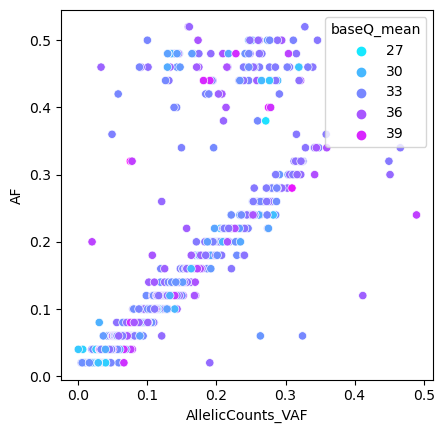

In [8]:
fig, ax = plt.subplots(figsize=(4.8, 4.8))
sns.scatterplot(data=calls1, x='AllelicCounts_VAF', y='AF', hue='baseQ_mean', palette='cool', ax=ax)
attila_utils.savefig(fig, 'AF-vs-AllelicCounts_VAF-baseQ_mean')

/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


['named-figure/AF-vs-AllelicCounts_VAF-mapQ_mean.png',
 'named-figure/AF-vs-AllelicCounts_VAF-mapQ_mean.pdf']

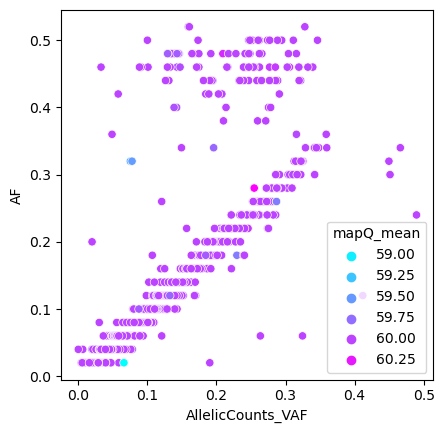

In [9]:
fig, ax = plt.subplots(figsize=(4.8, 4.8))
sns.scatterplot(data=calls1, x='AllelicCounts_VAF', y='AF', hue='mapQ_mean', palette='cool', ax=ax)
attila_utils.savefig(fig, 'AF-vs-AllelicCounts_VAF-mapQ_mean')

/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

['named-figure/AF-vs-AllelicCounts_VAF-baseQ_mean-mapQ_mean.png',
 'named-figure/AF-vs-AllelicCounts_VAF-baseQ_mean-mapQ_mean.pdf']

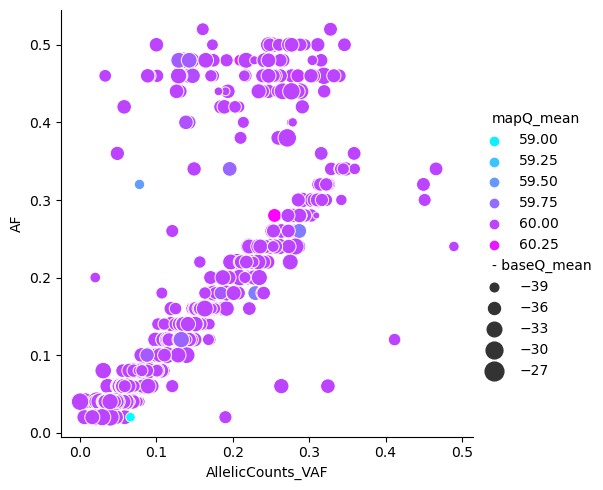

In [10]:
g = sns.relplot(
    data=calls1,
    x="AllelicCounts_VAF", y="AF",
    hue="mapQ_mean", size="- baseQ_mean",
    palette='cool', sizes=(10, 200))
attila_utils.savefig(fig, 'AF-vs-AllelicCounts_VAF-baseQ_mean-mapQ_mean')

/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

['named-figure/VAF-discrepancy-distribution.png',
 'named-figure/VAF-discrepancy-distribution.pdf']

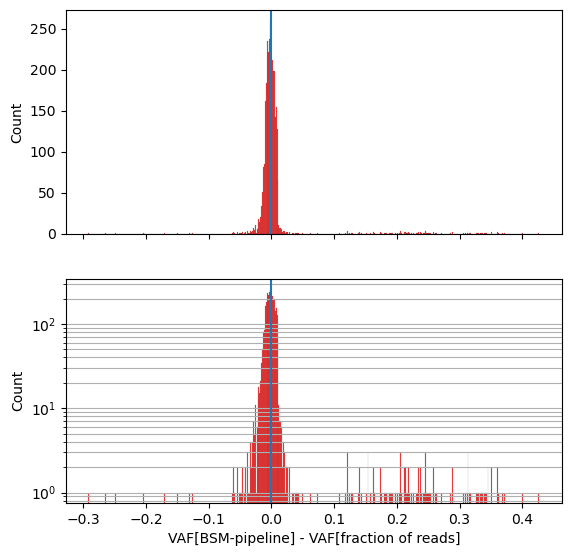

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(6.4, 6.4), sharex=True)
for axi in ax:
    sns.histplot(data=calls1['VAF difference'], ax=axi, color='red')
    axi.set_xlabel('VAF[BSM-pipeline] - VAF[fraction of reads]')
    axi.axvline(0)

ax[1].set_yscale('log')
ax[1].grid(axis='y', which='both')
attila_utils.savefig(fig, 'VAF-discrepancy-distribution')

In [12]:
%connect_info

{
  "shell_port": 41169,
  "iopub_port": 56913,
  "stdin_port": 50373,
  "control_port": 56081,
  "hb_port": 39473,
  "ip": "127.0.0.1",
  "key": "5dd8dc97-31624a9e46a59918b5b8418c",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "python3"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-82d92ae9-6b3c-4fb4-81fe-ac6ccbd8c873.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
